# PROBLEM 1  
PART 1

In [2]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

#X IS FEATURE; Y IS CLASS
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)
#200000, 14 = data points, features
#need to see 14 things for each P1Part1
#print(X.shape)

print('Min:', np.min(X,axis=0))
print('Max: ', np.max(X,axis=0))
print('Mean:', np.mean(X,axis=0)) 
print('Var: ', np.var(X,axis=0))

Min: [ 1.9350e+02  1.5250e+02  2.1425e+02  1.5250e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  8.7589e-01  0.0000e+00  0.0000e+00  0.0000e+00
  9.9049e-01 -9.9990e+02]
Max:  [2.5300e+02 2.4900e+02 2.5250e+02 2.5250e+02 3.1048e+04 1.3630e+04
 9.2380e+03 1.2517e+02 1.9167e+01 1.3230e+01 6.6761e+01 7.3902e+01
 9.7504e+02 7.9720e+02]
Mean: [2.41601104e+02 2.27376571e+02 2.41554150e+02 2.32826768e+02
 3.08992337e+03 9.28259020e+02 1.38093830e+02 3.24857933e+00
 6.49865290e+00 2.09713912e+00 4.21766041e+00 2.69171845e+00
 1.02715905e+01 5.78148050e+00]
Var:  [8.34991711e+01 9.26255931e+01 3.52863398e+01 9.76257317e+01
 1.56515138e+07 3.08176182e+06 4.43951746e+05 8.21948502e+00
 6.40504819e+00 4.36344047e+00 4.08637188e+00 2.19877847e+00
 4.04646245e+02 3.40652055e+03]


PART 2

In [4]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

#X IS FEATURE; Y IS CLASS
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

#tr = training; va = validation
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
#subsamples
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
#rescaled subsample for training
XtS, params = ml.rescale(Xt) # Normalize the features
#rescaled subsampel for validation
XvS, _ = ml.rescale(Xva, params) # Normalize the features

print('Min:', np.min(XtS,axis=0)) 
print('Max: ', np.max(XtS,axis=0)) 
print('Mean:', np.mean(XtS,axis=0)) 
print('Var: ', np.var(XtS,axis=0)) 

Min: [ -5.06825502  -3.70669306  -4.49178684  -2.75468141  -0.78430675
  -0.52787478  -0.20564186  -1.14881897  -2.01383162  -1.01639781
  -2.11143073  -1.79556185  -0.4786462  -21.06311633]
Max:  [ 1.23788346  2.07403114  1.72963578  1.93479594  7.07080987  7.04454509
 13.38113519  8.07302215  4.18944349  4.43425142  6.26636908 27.00912207
 50.25695516 15.39033346]
Mean: [ 1.42499124e-14 -4.10410594e-15 -8.03216382e-14  2.47230292e-14
 -8.57092175e-17 -1.82376336e-16 -1.00675024e-16 -2.33648656e-15
 -8.89241875e-15 -2.85949042e-16 -2.39117615e-15 -9.33864097e-16
  1.06157305e-15  2.20304330e-16]
Var:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


# PROBLEM 2
PART 1

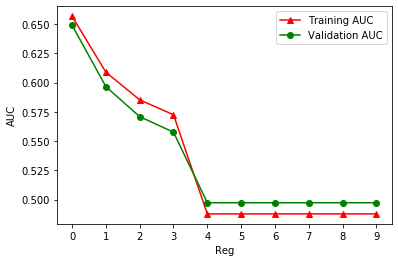

Train AUC: [0.65659567 0.60882925 0.58519991 0.57245213 0.48775351 0.48775351
 0.48775351 0.48775351 0.48775351 0.48775351]
Validation AUC: [0.64904021 0.59645656 0.57084251 0.55757692 0.49730735 0.49730735
 0.49730735 0.49730735 0.49730735 0.49730735]


In [26]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

#X IS FEATURE; Y IS CLASS
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
#subsamples
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
#rescaled subsample
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

reg = 10

#10 zeros
auc_tr = np.zeros(reg)
auc_va = np.zeros(reg)

#0 to 9
for i in range(0,reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=i, initStep=0.5, stopTol=1e-6, stopIter=100)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)

#prints only one of the plots if i don't use 2 reglists for some reason
reglist = range(0,reg)
reglist2 = range(0,reg)
    
plt.plot(reglist, auc_tr, marker='^', color = "red", label = "Training AUC")
plt.plot(reglist2, auc_va, marker='o', color = "green", label = "Validation AUC")

plt.xticks(reglist)
plt.xlabel("Reg")
plt.ylabel("AUC")
plt.legend()
plt.show()

print('Train AUC:',auc_tr)
print('Validation AUC:', auc_va)

PART 2  
There are 119 features which we get since we had 14 features originally, the same amount of degree 2 features, and the fact that each of those original features are matched to one of the other 13 degree 2 features (but not the other way around).  
  
This gives us 119 = 14 + 14 + 14x13/2 (divide by 2 since we don't want the other way around).

In [5]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

#X IS FEATURE; Y IS CLASS
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
#subsamples
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
#rescaled subsample
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

degree = 2
# Create polynomial features up to "degree"; don’t create constant feature
# (the linear regression learner will add the constant feature automatically)
XtP = ml.transforms.fpoly(Xt, degree, bias=False)
 
# Rescale the data matrix so that the features have similar ranges / variance
XtP,params = ml.transforms.rescale(XtP)
# "params" returns the transformation parameters (shift & scale)

# Then we can train the model on the scaled feature matrix:
#lr = ml.linear.linearRegress( XtP, Ytr ) # create and train model
#^not making predictions
    
# Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
XvaP = ml.transforms.fpoly(Xva, degree, bias = False)
XvaP,_ = ml.transforms.rescale( XvaP, params )    
    
print(XtP.shape)
print(XvaP.shape)

(5000, 119)
(40000, 119)


PART 3  
I'm not sure if the plot is supposed to look about the same each time, but it seems that it changes so I stuck with this one in the end.

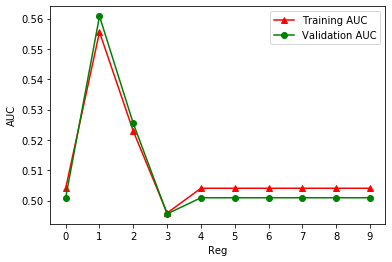

Train AUC: [0.50406525 0.55553662 0.52284673 0.49590448 0.50406525 0.50406525
 0.50406525 0.50406525 0.50406525 0.50406525]
Validation AUC: [0.50093393 0.56075051 0.52541748 0.49560817 0.50093393 0.50093393
 0.50093393 0.50093393 0.50093393 0.50093393]


In [16]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

#X IS FEATURE; Y IS CLASS
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
#subsamples
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
#rescaled subsample
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

#PART 2 CODE
degree = 2
# Create polynomial features up to "degree"; don’t create constant feature
# (the linear regression learner will add the constant feature automatically)
XtP = ml.transforms.fpoly(Xt, degree, bias=False)
 
# Rescale the data matrix so that the features have similar ranges / variance
XtP,params = ml.transforms.rescale(XtP)
# "params" returns the transformation parameters (shift & scale)

# Then we can train the model on the scaled feature matrix:
#lr = ml.linear.linearRegress( XtP, Ytr ) # create and train model
#^not making predictions
    
# Now, apply the same polynomial expansion & scaling transformation to Xtest(used xs since Xte didn't work and since xs was used in number 2 and it worked there):
XvaP = ml.transforms.fpoly(Xva, degree, bias = False)
XvaP,_ = ml.transforms.rescale( XvaP, params )    

#PART 1 CODE
reg = 10

#10 zeros
auc_tr = np.zeros(reg)
auc_va = np.zeros(reg)

#0 to 9
for i in range(0,reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtP, Yt, reg=i, initStep=0.5, stopTol=1e-6, stopIter=100)
    #auc_tr[i] = learner.auc(XtS, Yt)
    #auc_va[i] = learner.auc(XvS, Yva)
    auc_tr[i] = learner.auc(XtP, Yt)
    auc_va[i] = learner.auc(XvaP, Yva)

#prints only one of the plots if i don't use 2 reglists for some reason
reglist = range(0,reg)
reglist2 = range(0,reg)
    
plt.plot(reglist, auc_tr, marker='^', color = "red", label = "Training AUC")
plt.plot(reglist2, auc_va, marker='o', color = "green", label = "Validation AUC")

plt.xticks(reglist)
plt.xlabel("Reg")
plt.ylabel("AUC")
plt.legend()
plt.show()

print('Train AUC:',auc_tr)
print('Validation AUC:', auc_va)

# PROBLEM 3  
PART 1

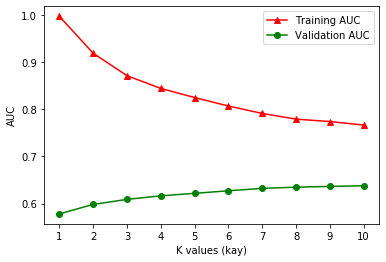

Train AUC: [0.99715504 0.91885471 0.87119507 0.84412358 0.82481381 0.80680485
 0.7910912  0.77896703 0.77389083 0.76640789]
Validation AUC: [0.57802644 0.59809668 0.60883983 0.61635251 0.62169815 0.62706811
 0.63223489 0.63474213 0.63634066 0.63770906]


In [4]:
#PPROBLEM 2 PART 1 CODE
kay = 10

#[0] * (kay-1)
#10 zeros
auc_tr = np.zeros(kay)
auc_va = np.zeros(kay)

#0 to 9
for i in range(0,kay):
    learner = ml.knn.knnClassify()
    learner.train(XtS, Yt, K=i+1, alpha = 0.0)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)

#prints only one of the plots if i don't use 2 reglists for some reason
kaylist = range(1,kay+1) #range(0,kay)
kaylist2 = range(1,kay+1)
    
plt.plot(kaylist, auc_tr, marker='^', color = "red", label = "Training AUC")
plt.plot(kaylist2, auc_va, marker='o', color = "green", label = "Validation AUC")

plt.xticks(kaylist)
plt.xlabel("K values (kay)")
plt.ylabel("AUC")
plt.legend()
plt.show()

print('Train AUC:',auc_tr)
print('Validation AUC:', auc_va)

PART 2

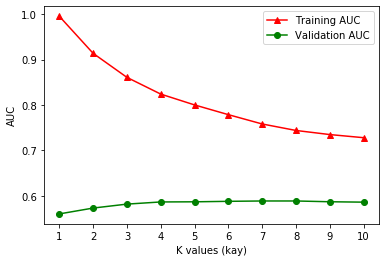

Train AUC: [0.99524124 0.91370019 0.86080731 0.82403833 0.80020424 0.77878877
 0.75830253 0.7440436  0.73502297 0.72814476]
Validation AUC: [0.56052928 0.57340293 0.58208392 0.58684255 0.58715756 0.58822478
 0.58897793 0.58898231 0.58727495 0.58639297]


In [5]:
#PPROBLEM 2 PART 1 CODE
kay = 10

#10 zeros
auc_tr = np.zeros(kay)
auc_va = np.zeros(kay)

#maybe putting this here makes it faster
learner = ml.knn.knnClassify()

#0 to 9; can't have 0 for KNN so add 1 to K
for i in range(0,kay):
    
    learner.train(Xt, Yt, K=i+1, alpha = 0.0)
    auc_tr[i] = learner.auc(Xt, Yt)
    auc_va[i] = learner.auc(Xva, Yva)

#prints only one of the plots if i don't use 2 reglists for some reason
kaylist = range(1,kay+1)
kaylist2 = range(1,kay+1)
    
plt.plot(kaylist, auc_tr, marker='^', color = "red", label = "Training AUC")
plt.plot(kaylist2, auc_va, marker='o', color = "green", label = "Validation AUC")

plt.xticks(kaylist)
plt.xlabel("K values (kay)")
plt.ylabel("AUC")
plt.legend()
plt.show()

print('Train AUC:',auc_tr)
print('Validation AUC:', auc_va)

PART 3

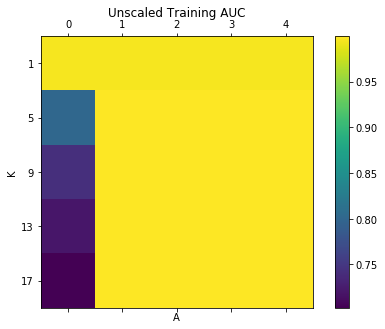

In [6]:
K = range(1,20,4) # Or something else
A = range(0,5,1) # Or something else
tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))

#putting this learner out of the for loop makes things faster?
learner = ml.knn.knnClassify()

for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(Xt, Yt, K=k, alpha = a)
        tr_auc[i][j] = learner.auc(Xt, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(Xva, Yva)
        
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
#need to replace mat with something else
caxtr = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(caxtr)
ax.set_xticklabels(['']+[*A])
ax.set_yticklabels(['']+[*K])
ax.set_xlabel("A")
ax.set_ylabel("K")
ax.set_title("Unscaled Training AUC")
plt.show()

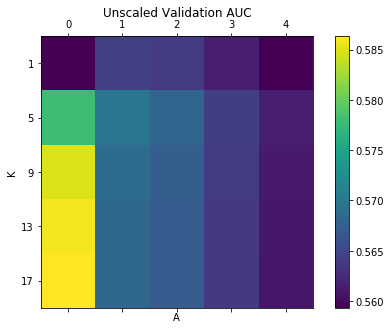

In [7]:
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
#need to replace mat with something else
caxva = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(caxva)
ax.set_xticklabels(['']+[*A])
ax.set_yticklabels(['']+[*K])
ax.set_xlabel("A")
ax.set_ylabel("K")
ax.set_title("Unscaled Validation AUC")
plt.show()

I would recommend a K of 17 and an A of 0 based on these results.

# PROBLEM 4  
PART 1

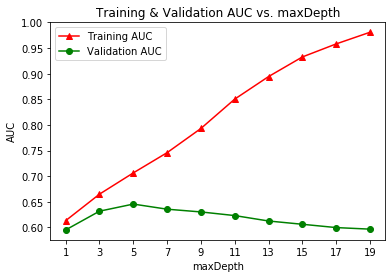

In [9]:
deptharr = np.array(range(1,20,2))
tr_auc = np.zeros(deptharr.shape[0])
va_auc = np.zeros(deptharr.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(deptharr): 
    learner.train(XtS, Yt, maxDepth = d, minParent = 2, minLeaf= 1)
    tr_auc[i] = learner.auc(XtS, Yt)
    va_auc[i] = learner.auc(XvS, Yva)
    
plt.plot(deptharr, tr_auc, marker='^', color = "red", label = "Training AUC")
plt.plot(deptharr, va_auc, marker='o', color = "green", label = "Validation AUC")
plt.xticks(deptharr)
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("Training & Validation AUC vs. maxDepth")
plt.legend()
plt.show()

#print 'Train AUC:', tr_auc
#print 'Validation AUC:', va_auc

PART 2

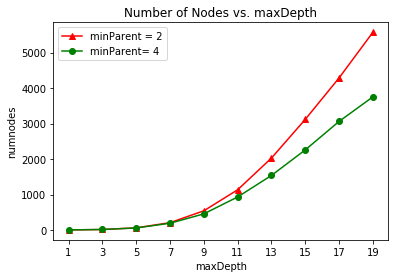

In [10]:
#deptharr = np.array(range(1,20,2))
#minParent2
numnodes2 = np.zeros(deptharr.shape[0])
#minParent4
numnodes4 = np.zeros(deptharr.shape[0])

learner = ml.dtree.treeClassify()
for i, d in enumerate(deptharr): 
    learner.train(Xt, Yt, maxDepth = d, minParent = 2, minLeaf= 1)
    numnodes2[i] = learner.sz

#chose to increase minParent from 2 to 4
for i, d in enumerate(deptharr): 
    learner.train(Xt, Yt, maxDepth = d, minParent = 4, minLeaf= 1)
    numnodes4[i] = learner.sz
    
plt.plot(deptharr, numnodes2, marker='^', color = "red", label = "minParent = 2")
plt.plot(deptharr, numnodes4, marker='o', color = "green", label = "minParent= 4")
plt.xticks(deptharr)
plt.xlabel("maxDepth")
plt.ylabel("numnodes")
plt.title("Number of Nodes vs. maxDepth")
plt.legend()
plt.show()

PART 3

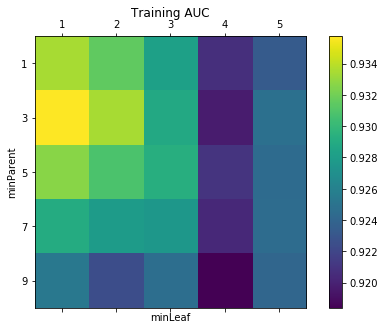

In [12]:
K = range(1,10,2) # Or something else
A = range(1,6,1) # Or something else

tr_auc = np.zeros((len(K),len(A)))
va_auc = np.zeros((len(K),len(A)))

for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner = ml.dtree.treeClassify()
        learner.train(Xt, Yt, maxDepth = 15, minParent = k, minLeaf = a)
        tr_auc[i][j] = learner.auc(Xt, Yt) # train learner using k and a
        va_auc[i][j] = learner.auc(Xva, Yva)
    
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
#need to replace mat with something else
caxtr4 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(caxtr4)
ax.set_xticklabels(['']+[*A])
ax.set_yticklabels(['']+[*K])
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Training AUC")
plt.show()

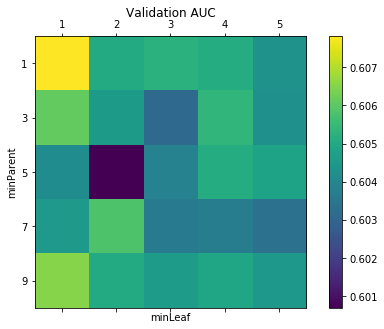

In [13]:
# Now plot it
f, ax = plt.subplots(1, 1, figsize=(8, 5))
#need to replace mat with something else
caxva4 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(caxva4)
ax.set_xticklabels(['']+[*A])
ax.set_yticklabels(['']+[*K])
ax.set_xlabel("minLeaf")
ax.set_ylabel("minParent")
ax.set_title("Validation AUC")
plt.show()

I recommend:  
minParent = 3  
minLeaf = 1

# PROBLEM 5  
PART 1

it 1 : Jsur = 0.4193033710343697, J01 = 0.3122
it 2 : Jsur = 0.41760779134942577, J01 = 0.3138
it 4 : Jsur = 0.4181134502248675, J01 = 0.3124
it 8 : Jsur = 0.4190072979256925, J01 = 0.3116
it 16 : Jsur = 0.41974114255237893, J01 = 0.314
it 32 : Jsur = 0.4203156329562171, J01 = 0.317
it 64 : Jsur = 0.4209064395662542, J01 = 0.318
it 128 : Jsur = 0.42155749025217226, J01 = 0.3206
it 256 : Jsur = 0.42216358364198714, J01 = 0.3214
it 1 : Jsur = 0.4199150907552506, J01 = 0.3096
it 2 : Jsur = 0.4175663851098601, J01 = 0.3138
it 4 : Jsur = 0.4155052126224272, J01 = 0.31
it 8 : Jsur = 0.4154663306970902, J01 = 0.3088
it 16 : Jsur = 0.4163639912926987, J01 = 0.3074
it 32 : Jsur = 0.41736050902954014, J01 = 0.3086
it 64 : Jsur = 0.41811386582620336, J01 = 0.3092
it 128 : Jsur = 0.41871327760111016, J01 = 0.3116
it 256 : Jsur = 0.4193289814749749, J01 = 0.313
it 1 : Jsur = 0.418485139710974, J01 = 0.315
it 2 : Jsur = 0.4153022321854929, J01 = 0.3078
it 4 : Jsur = 0.4141060838629941, J01 = 0.3086


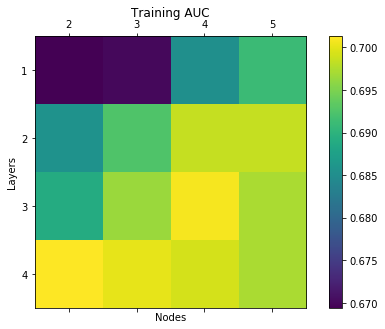

In [15]:
layers = range(1,5,1) 
nodes = range(2,6,1) 

tr_auc = np.zeros((len(layers),len(nodes)))
va_auc = np.zeros((len(layers),len(nodes)))


for i, layer in enumerate(layers):
    for j, node in enumerate(nodes):
        nn = ml.nnet.nnetClassify()
        nn.init_weights([XtS.shape[1],layer*node,2], 'random', XtS, Yt)
        nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)
        tr_auc[i][j] = nn.auc(XtS, Yt) 
        va_auc[i][j] = nn.auc(XvS, Yva)

print("tr_auc:", tr_auc)
print("va_auc:", va_auc)

f, ax = plt.subplots(1, 1, figsize=(8, 5))
caxtr5 = ax.matshow(tr_auc, interpolation='nearest')
f.colorbar(caxtr5)
ax.set_xticklabels(['']+[*nodes])
ax.set_yticklabels(['']+[*layers])
ax.set_xlabel("Nodes")
ax.set_ylabel("Layers")
ax.set_title("Training AUC")
plt.show()

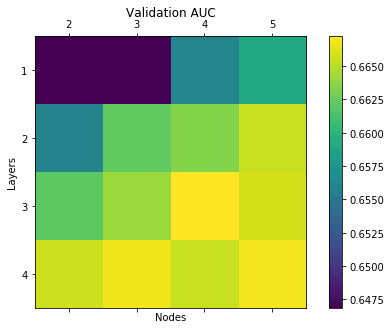

In [16]:
f, ax = plt.subplots(1, 1, figsize=(8, 5))
caxva5 = ax.matshow(va_auc, interpolation='nearest')
f.colorbar(caxva5)
ax.set_xticklabels(['']+[*nodes])
ax.set_yticklabels(['']+[*layers])
ax.set_xlabel("Nodes")
ax.set_ylabel("Layers")
ax.set_title("Validation AUC")
plt.show()

PART 2

In [17]:
#-z^2/2
sig = lambda z: np.atleast_2d(np.exp(-z**2/2))
#-z*sig(z)
dsig = lambda z: np.atleast_2d(-z*np.exp(-z**2/2))

nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
nn.setActivation('custom', sig, dsig)

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=100)

print("Gaussian TR: {}".format(nn.auc(XtS, Yt)))
print("Gaussian VA: {}".format(nn.auc(XvS, Yva)))

it 1 : Jsur = 0.4519821609311485, J01 = 0.3532
it 2 : Jsur = 0.45212734121517767, J01 = 0.3532
it 4 : Jsur = 0.452386935350052, J01 = 0.3532
it 8 : Jsur = 0.45269280459474104, J01 = 0.3532
it 16 : Jsur = 0.4530717532751667, J01 = 0.3532
it 32 : Jsur = 0.4533615431600854, J01 = 0.3532
it 64 : Jsur = 0.4535055829184996, J01 = 0.3532
Gaussian TR: 0.592139120653924
Gaussian VA: 0.5677437687844875


In [18]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
nn.setActivation('logistic')

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

print("Logistic TR: {}".format(nn.auc(XtS, Yt)))
print("Logistic VA: {}".format(nn.auc(XvS, Yva)))

it 1 : Jsur = 0.41847919850051474, J01 = 0.3084
it 2 : Jsur = 0.4192457854917322, J01 = 0.3092
it 4 : Jsur = 0.41997219584324086, J01 = 0.3076
it 8 : Jsur = 0.4212755866531008, J01 = 0.3108
it 16 : Jsur = 0.42251617627441157, J01 = 0.3144
it 32 : Jsur = 0.4235961147905387, J01 = 0.3192
it 64 : Jsur = 0.42451467333107473, J01 = 0.3208
it 128 : Jsur = 0.4252978910332081, J01 = 0.323
it 256 : Jsur = 0.4259730884363456, J01 = 0.3254
Logistic TR: 0.6684404483506571
Logistic VA: 0.6452506295979438


In [19]:
nn = ml.nnet.nnetClassify()
nn.init_weights([XtS.shape[1], 5, 2], 'random', XtS, Yt)
nn.setActivation('htangent')

nn.train(XtS, Yt, stopTol=1e-8, stepsize=.25, stopIter=300)

print("HTangent TR: {}".format(nn.auc(XtS, Yt)))
print("HTangent VA: {}".format(nn.auc(XvS, Yva)))

it 1 : Jsur = 0.41858203594840854, J01 = 0.3096
it 2 : Jsur = 0.4147024542133411, J01 = 0.3072
it 4 : Jsur = 0.41302452050199884, J01 = 0.3088
it 8 : Jsur = 0.4114630210912319, J01 = 0.306
it 16 : Jsur = 0.4093249074387978, J01 = 0.303
it 32 : Jsur = 0.4074519989533436, J01 = 0.3014
it 64 : Jsur = 0.4062440776062309, J01 = 0.3006
it 128 : Jsur = 0.4053724251661586, J01 = 0.3008
it 256 : Jsur = 0.40455987263750964, J01 = 0.3018
HTangent TR: 0.6899624670211953
HTangent VA: 0.6577243447825207


Based on these results, I think HTangent is the best, Logistic is the second best, and Gaussian is the worst among these 3 activation functions. I made this decision by ranking TR and VA from highest to lowest.

# PROBLEM 6  
CONCLUSION  
I think that the classifier that will perform the best is the decision tree since it ran the fastest as I was doing this homework. I chose minParent = 3, minLeaf = 1 since that's what I got in Problem 4.3. I chose a depth of 20 since it had the highest TR_auc and a decent-ish VA_auc. I tried increasing the depth but my score actually got lower, so I stuck with 20. Kaggle = Marc Raymond Serrano; score = 0.70894

In [5]:
import sys
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt

#X IS FEATURE; Y IS CLASS
# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
#subsamples
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
#rescaled subsample
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

Xte = np.genfromtxt('data/X_test.txt', delimiter=None)
k = 3
a = 1


In [11]:
mdarr = [15, 20, 25, 30, 35]

tr_auc = np.zeros((len(mdarr)))
va_auc = np.zeros((len(mdarr)))

for i,k in enumerate(mdarr):
    learner = ml.dtree.treeClassify()
    learner.train(Xt, Yt, maxDepth = k, minParent = k, minLeaf = a)
    tr_auc[i] = learner.auc(Xt, Yt) # train learner using k and a
    va_auc[i] = learner.auc(Xva, Yva)
    print("Depth = {}, TR_AUC = {}, VA_AUC = {}".format(k, tr_auc[i], va_auc[i]))

Depth = 15, TR_AUC = 0.8995470058124033, VA_AUC = 0.5979404410957956
Depth = 20, TR_AUC = 0.9254770792228799, VA_AUC = 0.5973153220099248
Depth = 25, TR_AUC = 0.9212262038073908, VA_AUC = 0.5986795502062047
Depth = 30, TR_AUC = 0.9110876481985104, VA_AUC = 0.6049783940958467
Depth = 35, TR_AUC = 0.8971666755541337, VA_AUC = 0.6067088672630981


In [15]:
mdarr2 = [500, 1000, 1500, 2000]

tr_auc = np.zeros((len(mdarr)))
va_auc = np.zeros((len(mdarr)))

for i,k in enumerate(mdarr2):
    learner = ml.dtree.treeClassify()
    learner.train(Xt, Yt, maxDepth = k, minParent = k, minLeaf = a)
    tr_auc[i] = learner.auc(Xt, Yt) # train learner using k and a
    va_auc[i] = learner.auc(Xva, Yva)
    print("Depth = {}, TR_AUC = {}, VA_AUC = {}".format(k, tr_auc[i], va_auc[i]))

Depth = 500, TR_AUC = 0.7067492312341137, VA_AUC = 0.635616029762195
Depth = 1000, TR_AUC = 0.66803880268046, VA_AUC = 0.6367543274574852
Depth = 1500, TR_AUC = 0.6559320286531933, VA_AUC = 0.6346776301242373
Depth = 2000, TR_AUC = 0.6404872998098082, VA_AUC = 0.6235939079503919


In [16]:
mdarr2 = [1000, 1100, 1200, 1300, 1400]

tr_auc = np.zeros((len(mdarr)))
va_auc = np.zeros((len(mdarr)))

for i,k in enumerate(mdarr2):
    learner = ml.dtree.treeClassify()
    learner.train(Xt, Yt, maxDepth = k, minParent = k, minLeaf = a)
    tr_auc[i] = learner.auc(Xt, Yt) # train learner using k and a
    va_auc[i] = learner.auc(Xva, Yva)
    print("Depth = {}, TR_AUC = {}, VA_AUC = {}".format(k, tr_auc[i], va_auc[i]))

Depth = 1000, TR_AUC = 0.66803880268046, VA_AUC = 0.6367543274574852
Depth = 1100, TR_AUC = 0.6621891608453758, VA_AUC = 0.6375631544163102
Depth = 1200, TR_AUC = 0.6621891608453758, VA_AUC = 0.6375631544163102
Depth = 1300, TR_AUC = 0.660730638653371, VA_AUC = 0.6364793697181012
Depth = 1400, TR_AUC = 0.6559320286531933, VA_AUC = 0.6346776301242373


In [17]:
#submission 2
learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 1100, minParent = k, minLeaf = a)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit2.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

In [ ]:
#submission 1
learner = ml.dtree.treeClassify()
learner.train(X, Y, maxDepth = 20, minParent = k, minLeaf = a)
Yte = np.vstack((np.arange(Xte.shape[0]), learner.predictSoft(Xte)[:,1])).T
np.savetxt('Y_submit.txt', Yte, '%d, %.2f', header='ID,Prob1', comments='', delimiter=',')

# Statement of Collaboration  
I used Google, lecture slides, and previous good homework submissions provided to us. I used the official scipy/numpy documentation, geeksforgeeks.org, and some of the official Jupyter Notebook documentation (didn't realize variables in previously ran cells can carry over). I used some (read: a lot of) Piazza help as well.  
I collaborated with Kevin De Jesus and Julian Andrews as well.